# Neural Network

1. The **input layer**, consists of a set of neurons {${x_i|x_1,x_2,x_3... x_m}$} representing the input features.

2. Each neuron in the **hidden layer** transforms the values from the previous layer with a **weighted linear summation** $w_1x_1+w_2x_2+...+w_mx_m$ , **followed** by a **non-linear activation function** $g(·): R -> R $ - like the hyperbolic tan function.

3. The **output layer** receives the values from the last hidden layer and transforms them into output values.

4. **`coefs_`** is a list of **weight matrices**, where weight matrix at index $i$  represents the weights between layer $i$ and layer $i+1$.

5. **`intercepts_ `** is a list of **bias vectors**, where the vector at index $i$ represents the bias values added to layer $i+1$.

6. The **advantages** of Multi-layer Perceptron are:
 - Capability to **learn non-linear models**.
 - Capability to **learn models in real-time** (on-line learning) using `partial_fit`.

7. The **disadvantages** of Multi-layer Perceptron (MLP) include:
 - MLP with hidden layers have a non-convex loss function where there exists **more than one local minimum**. Therefore, different random weight initializations **can lead to different validation accuracy**.
 - MLP requires **tuning a number of hyperparameters** such as the number of hidden neurons, layers, and iterations.
 - MLP is **sensitive** to feature **scaling**.


## Regularization and overfitting

As we all know NN are complex structures for simple models that depending on the number of elements could approximate almost any sample data. But it is also know as well that databases might have “**noise-data**”, or samples that are not really following the general pattern and should be considered as **“outlier”**. We should be **careful to incorporate them** into our model, because will make it **difficult to generalize properly**. This phenomenon of adjusting a model to an outlier is called **overfitting**.

In order to set properly the model to prevent this situation from happening we should incorporate a few **precautions**. First would be that the **number of neurons**, whatever the model is selected should be **a number of orders of magnitude lower** than the sample base. But normally this is not enough to prevent a bad fitting of the underlying model, especially if outliers are present. This is the reason why we incorporate a **margin of security** to the model definition. To evaluate different accepted margins of error for the samples, a **coefficient “alpha”** is defined in the model as it could be shown in NN theory documentation.

The following sample code shows some examples of different sample bases, models and alphas that illustrate these situations. Please run the code and follow it carefully for better understanding of the model.


1. Machine Learning for OR Function

In [1]:
%reset -f
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import scipy as sp
import numpy as np
import pylab as plt
import os as os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Train Values
X = np.transpose(np.array([[1,1,0,0],[1,0,1,0]]))
print('X =', X)

# Train Labels
Y = np.array([1,1,1,0])
print('Y =', Y)

# Creation of a NN with 2 in hidden layer
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=2,random_state= 1);

# Training the net
net.fit(X,Y)

X = [[1 1]
 [1 0]
 [0 1]
 [0 0]]
Y = [1 1 1 0]


MLPClassifier(activation='tanh', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

2. In Machine Leaning applications it is commonly used apart from the accuracy other parameters called sensitivity (sen), specificity (spe), positive predictive value (ppv) and negative predictive value (NPV). The student is required to find-out the meaning of these 4 parameters and to build a function to provide all these parameters:
[sen,spe,ppv,npv,acc] = med_stad (net,input,target)

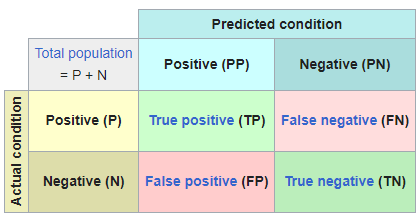

In [18]:
def med_stad(net,data,target):
    import numpy as np

    output = net.predict(data)
    zeros = np.argwhere(target==0)
    ones = np.argwhere(target==1)
    TN = np.sum(output[zeros]<0.5)
    FN = np.sum(output[zeros]>=0.5)
    TP = np.sum(output[ones]>=0.5)
    FP = np.sum(output[ones]<0.5)

    sen = 1.*TP/(TP+FN)
    # sensitivity (true positive rate):
    # is the probability of a positive test result, conditioned on the individual truly being positive.

    spe = 1.*TN/(TN+FP)
    # specificity (true negative rate):
    # is the probability of a negative test result, conditioned on the individual truly being negative.

    ppv = 1.*TP/(TP+FP)
    # positive predictive value
    # % of true positive out of all instances flagged as positive

    npv = 1.*TN/(TN+FN)
    # negative predictive value
    # % of true negatives out of all instnaces flagged as negative

    acc = 1.*(TN+TP)/(TN+TP+FN+FP)
    # accuracy
    # % of accurate prediction out of all predictions

    return sen,spe,ppv,npv,acc

3. Build a machine learning model to classify cancer. Then, use these functions calculate all these parameters for training set and test set.

Student should go to the following link (http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) to download the wdbc.data file. In this file, we have the data of 569 evaluated women of breast cancer. Each woman is described by 32 attributes. The first is an identifier; the second type of cancer (malignant or benign) and the rest are the result of other medical tests. We intend to learn the type of cancer. In this set the distribution is 357 benign tumors and 212 malignant tumors.

In [7]:
%reset -f
from sklearn.neural_network import MLPClassifier
import csv
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import scipy as sp
import numpy as np
import pylab as plt
import os as os
import plotly.graph_objects as go
import plotly.express as px

In [8]:
wdbc = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, sep=",")

In [11]:
# Transform the DataFrame to work with it as an array
# Although we can work with it as a DataFrame, but for ML it is easier working with arrays.

PatientCode=wdbc[0]         # 1st column is the id
Y_test=wdbc[1]              # 2nd column is the lable
data=wdbc.to_numpy()[:,2:]  # All other columns are information from patients

Replace the M's for 1 and B's by 0.  

In [12]:
Ids = PatientCode.values            # Record of the ids
target_text = Y_test.values         # Record (strings) of target
target=np.ones(target_text.shape);  # Define a new numerical array with ones of the same size as the target
target[target_text=='M']=0          # Replace all Malignant with 0 as a label.

In [13]:
# Train - test split 50/50
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        data, target, test_size=0.5, random_state=42)

What we do know you need 30 input neurons and one output. This information isn’t necessary to be supplied to the net, as it could be inferred by the data. So will only define:
*	The activation function: tanh
*	The solver method: lbfgs
*	Number of neurons of the hidden layer: 10
*	The random state: 42 (just for initializing and productivity)


In [14]:
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=10,random_state= 42)

Now we train the network

In [16]:
# Training the net
net.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=10, random_state=42,
              solver='lbfgs')

Test accuracy using the med_stad function built previously

In [30]:
def med_stad(net,data,target):
    import numpy as np

    output = net.predict(data)
    zeros = np.argwhere(target==0)
    ones = np.argwhere(target==1)
    TN = np.sum(output[zeros]<0.5)
    FN = np.sum(output[zeros]>=0.5)
    TP = np.sum(output[ones]>=0.5)
    FP = np.sum(output[ones]<0.5)

    sen = 1.*TP/(TP+FN)
    # sensitivity (true positive rate):
    # is the probability of a positive test result, conditioned on the individual truly being positive.

    spe = 1.*TN/(TN+FP)
    # specificity (true negative rate):
    # is the probability of a negative test result, conditioned on the individual truly being negative.

    ppv = 1.*TP/(TP+FP)
    # positive predictive value
    # % of true positive out of all instances flagged as positive

    npv = 1.*TN/(TN+FN)
    # negative predictive value
    # % of true negatives out of all instnaces flagged as negative

    acc = 1.*(TN+TP)/(TN+TP+FN+FP)
    # accuracy
    # % of accurate prediction out of all predictions

    return sen,spe,ppv,npv,acc

In [22]:
med_stad(net,X_train, y_train)

(0.5985915492957746, nan, 1.0, 0.0, 0.5985915492957746)

In [23]:
med_stad(net,X_test,y_test)

(0.656140350877193, nan, 1.0, 0.0, 0.656140350877193)

Improve accuracy by normalizing data

In [25]:
# Apply Scaling to X_train and X_test based on X_train

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

net.fit(X_train_std,y_train)

normalized_acc = med_stad(net,X_test_std,y_test)
print('Accuracy after normalizing', normalized_acc)

Accuracy after normalizing (0.988950276243094, 0.9230769230769231, 0.9572192513368984, 0.9795918367346939, 0.9649122807017544)


4. The student is required to modify all parameters in this process to improve the accuracy over the test set. You may try different numbers of neurons in hidden layer, different sizes of samples in training and test. What is the best accuracy obtained?

In [26]:
%reset -f
from sklearn.neural_network import MLPClassifier
import csv
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import scipy as sp
import numpy as np
import pylab as plt
import os as os
import plotly.graph_objects as go
import plotly.express as px

In [43]:
wdbc = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None, sep=",")
PatientCode=wdbc[0]         # 1st column is the id
Y_test=wdbc[1]              # 2nd column is the lable
data=wdbc.to_numpy()[:,2:]  # All other columns are information from patients
Ids = PatientCode.values            # Record of the ids
target_text = Y_test.values         # Record (strings) of target
target=np.ones(target_text.shape);  # Define a new numerical array with ones of the same size as the target
target[target_text=='M']=0


In [44]:
# 10 hidden layers; Normalized; Train-test split 70/30

net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=10,random_state= 42)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        data, target, test_size=0.3, random_state=42)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
net.fit(X_train_std,y_train)

normalized_acc = med_stad(net,X_test_std,y_test)
print('Accuracy: normalized with 70-30 train-test split', normalized_acc)

Accuracy: normalized with 70-30 train-test split (0.9902912621359223, 0.9117647058823529, 0.9444444444444444, 0.9841269841269841, 0.9590643274853801)


In [45]:
# 8 hidden layers; Normalized; Train - test split 70/30;
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=8,random_state= 42)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        data, target, test_size=0.3, random_state=42)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
net.fit(X_train_std,y_train)

normalized_acc = med_stad(net,X_test_std,y_test)
print('Accuracy: ', normalized_acc)

Accuracy:  (0.9805825242718447, 0.8970588235294118, 0.9351851851851852, 0.9682539682539683, 0.9473684210526315)


In [48]:
# 11 hidden layers; Normalized; Train - test split 70/30;
net = MLPClassifier(solver = 'lbfgs',activation ='tanh' ,hidden_layer_sizes=11,random_state= 42)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        data, target, test_size=0.3, random_state=42)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
net.fit(X_train_std,y_train)

normalized_acc = med_stad(net,X_test_std,y_test)
print('Accuracy: ', normalized_acc)

Accuracy:  (0.9813084112149533, 0.953125, 0.9722222222222222, 0.9682539682539683, 0.9707602339181286)


# Autoencoders

## How Do Autoencoders Work?

**Autoencoders** output as a reconstruction of the input. The autoencoder consists of **two network**s: an **encoder** and a **decoder**. During training, the **encoder** **learns a set of features**, known as a **latent representation**, from input data. At the same time, the **decoder** is trained to **reconstruct** the data based on **these features**. The **autoencoder** can then be applied to **predict** **inputs** not previously seen. Autoencoders are **very generalizable** and can be used on different data types, including images, time series, and text. [Ref](https://www.mathworks.com/discovery/autoencoder.html)

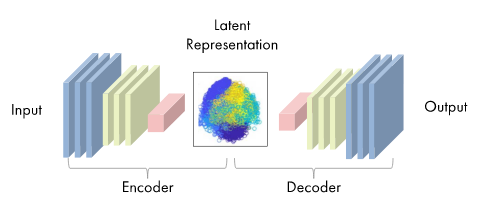

[Ref](https://www.mathworks.com/discovery/autoencoder.html)

In [1]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

Input dataset

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# this original data type is an array with dimension 28*28
# 10000 test samples and 60000 train samples
# so for instance, x_test is (10000, 28, 28)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255. # astype changes datatype
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# change data type, so now, for instance, x_test is (10000, 784)
# then change x_train and x_test as matrices of 0s

Represent some of them

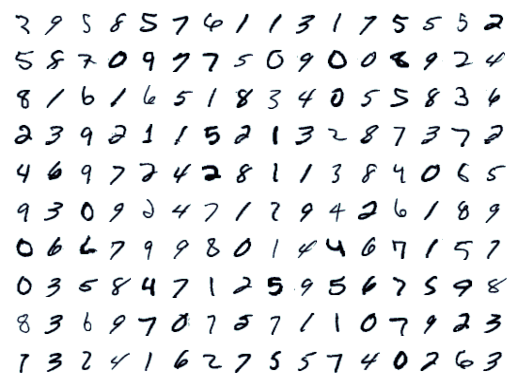

In [4]:
#Professor code

n_rows=10;n_col=16; starting_registy=500
fig, axs = plt.subplots(n_rows,n_col);
for i in range(n_col*n_rows):
    axs[int(i/n_col),i%n_col].imshow((((x_train[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');
    axs[int(i/n_col),i%n_col].axis('off')

Build the autoencoder with one hidden (encoded) layer with 32 units neurons. The input and output layer (decoded layer) each have 784 units neurons.

In [5]:
n_samples,n_features=np.shape(x_train);
bottleneck_size = 2;
# cone=[512,128,64];

input_img = Input(shape=(n_features,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

Model training

The `fit()` method on a Keras Model returns an `ae` object.

The `ae.history` attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
For our model we don't have metrics values because we didn't specify metrics when we compiled the model.

In [ ]:
AE_Training_History=ae.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_test, x_test))

save_model=False
if save_model:
    ae.save('model.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


Plot a few of them to see how the autoencoders do

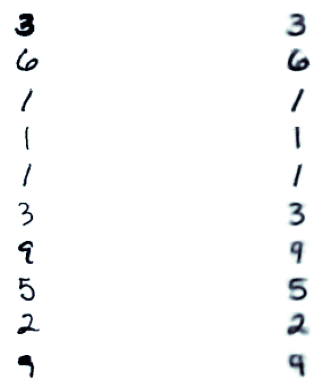

In [9]:
n_rows=10;n_col=2; starting_registy=200
fig, axs = plt.subplots(n_rows,n_col);
for i in range(n_rows):
    axs[i,0].imshow((((x_test[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[i,0].axis('off')
    axs[i,1].imshow((((decoded_imgs[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[i,1].axis('off')

Evaluate results

dict_keys(['loss', 'val_loss'])


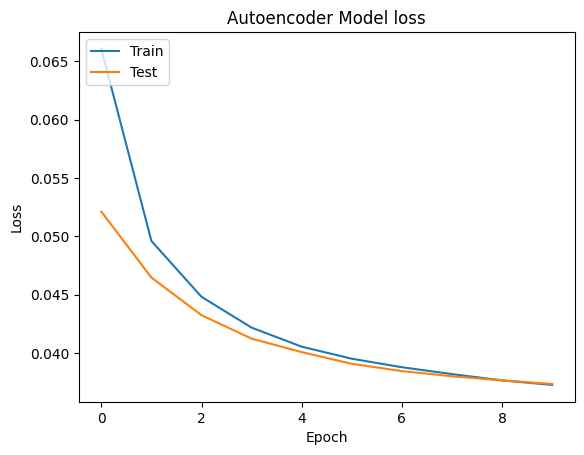

In [10]:
# list all data in history
print(AE_Training_History.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History.history['loss'])
plt.plot(AE_Training_History.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now we will plot the latent space for this test samples

In [11]:
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x=encoded_imgs[np.where(y_test==i)][:,0], y=encoded_imgs[np.where(y_test==i)][:,1],mode='markers',name=str(i)))

fig.show()

**Generative image from any coordinates inside the 2D latent space?**

If we pick any point in this domain, do you think the generative image would be similar enough to the surrounding class?

To test it, observe again the image and try to identify a cluster of points where you can allocate coordinates free from samples (inside a gap surrounded by samples of the very same class).

In [12]:
# title Latent Domain Image by Class (same as previous)
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x=encoded_imgs[np.where(y_test==i)][:,0], y=encoded_imgs[np.where(y_test==i)][:,1],mode='markers',name=str(i)))

fig.show()



1/1 [==============================] - 0s 84ms/step


Text(0.5, 1.0, 'Generative Image')

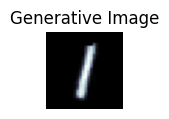

In [17]:
# Pick the point in the latent space
x_coordinate=-40
y_coordinate=35

# Create a "new number not in the sample base"
Encoded_Generative_IMG=np.array([[x_coordinate,y_coordinate]])

# Decode this generative sample
Decoded_Generative_IMG = decoder.predict(Encoded_Generative_IMG)

# Plot the output of the generative sample
plt.figure(figsize=(1,1))
plt.imshow(((Decoded_Generative_IMG-255)-1).reshape(28,28),cmap='bone')
plt.axis('off')
plt.title('Generative Image')

Next, try the same thing but a latent space with 3 dimensions

In [19]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

# Import dataset
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [21]:
# Define autoencoder

n_samples,n_features=np.shape(x_train);
bottleneck_size = 3;
# cone=[512,128,64];

input_img3d = Input(shape=(n_features,))

encoded3d = Dense(512, activation='relu')(input_img3d)
encoded3d = Dense(128, activation='relu')(encoded3d)
encoded3d = Dense(64, activation='relu')(encoded3d)
encoded3d = Dense(bottleneck_size, activation='linear')(encoded3d)
encoder3d = Model(input_img3d, encoded3d)


encoded_input3d = Input(shape=(bottleneck_size,))
decoded3d = Dense(64, activation='relu')(encoded_input3d)
decoded3d = Dense(128, activation='relu')(decoded3d)
decoded3d = Dense(512, activation='relu')(decoded3d)
decoded3d = Dense(n_features, activation='sigmoid')(decoded3d)
decoder3d = Model(encoded_input3d, decoded3d)

full3d = decoder3d(encoder3d(input_img3d))
ae3d = Model(input_img3d, full3d)
ae3d.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Training autoencoder
AE_Training_History3d=ae3d.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_test, x_test))

save_model=False
if save_model:
    ae3d.save('model.h5')
    encoder3d.save('encoder.h5')
    decoder3d.save('decoder.h5')

Epoch 1/10
235/235 [==============================] - 8s 29ms/step - loss: 0.0657 - val_loss: 0.0470
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0428 - val_loss: 0.0405
Epoch 3/10
235/235 [==============================] - 6s 28ms/step - loss: 0.0391 - val_loss: 0.0382
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0369 - val_loss: 0.0361
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0352 - val_loss: 0.0348
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0341 - val_loss: 0.0340
Epoch 7/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0333 - val_loss: 0.0334
Epoch 8/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0327 - val_loss: 0.0327
Epoch 9/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0322 - val_loss: 0.0324
Epoch 10/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0317 - val_lo

In [23]:
# run autoencoder over test set
encoded_imgs3d = encoder3d.predict(x_test)
decoded_imgs3d = decoder3d.predict(encoded_imgs3d)

313/313 [==============================] - 1s 2ms/step


dict_keys(['loss', 'val_loss'])


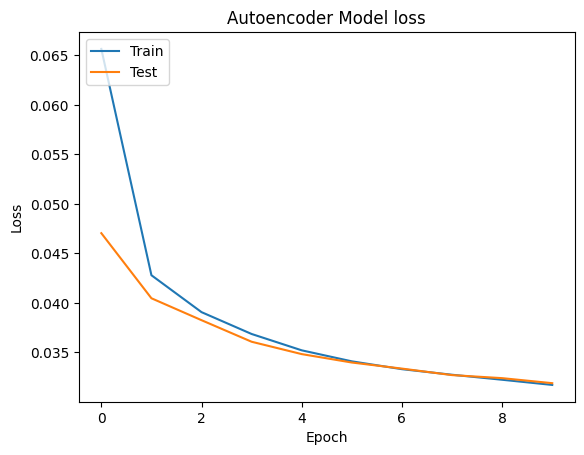

In [25]:
# Training Statistics
# list all data in history
print(AE_Training_History3d.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History3d.history['loss'])
plt.plot(AE_Training_History3d.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
# Latent Space Representation
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter3d(x=encoded_imgs3d[np.where(y_test==i)][:,0], y=encoded_imgs3d[np.where(y_test==i)][:,1],z=encoded_imgs3d[np.where(y_test==i)][:,2],mode='markers',name=str(i)))

fig.show()

1/1 [==============================] - 0s 48ms/step


Text(0.5, 1.0, 'Generative Image')

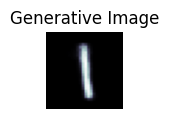

In [28]:
# Pick a point in latent space and see the decoding result

x_coordinate=11
y_coordinate=25
z_coordinate=-9

# Create a "new number not in the sample base"
Encoded_Generative_IMG=np.array([[x_coordinate,y_coordinate,z_coordinate]])

# Decode this generative sample
Decoded_Generative_IMG = decoder3d.predict(Encoded_Generative_IMG)

# Plot the output of the generative sample
plt.figure(figsize=(1,1))
plt.imshow(((Decoded_Generative_IMG-255)-1).reshape(28,28),cmap='bone')
plt.axis('off')
plt.title('Generative Image')
